In [1]:
import pandas as pd
train=pd.read_csv("C:/Users/MYCOM/Downloads/train_merged.csv")

## 0) 데이터 로드

In [2]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,National
1,1,2013-01-01,42,CELEBRATION,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National
2,2,2013-01-01,42,BREAD/BAKERY,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National
3,3,2013-01-01,42,BOOKS,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National
4,4,2013-01-01,42,BEVERAGES,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National


In [3]:
train['holiday'].value_counts()

Normal      2746128
National     249480
Local         11418
Regional        990
Name: holiday, dtype: int64

In [4]:
train.shape

(3008016, 13)

## 1) 데이터 전처리

In [5]:
train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales             7128
onpromotion       7128
city                 0
state                0
type                 0
cluster              0
dcoilwtico      935550
transactions    252912
holiday              0
dtype: int64

### a) sales 변수

In [8]:
train[train['sales'].isna()]['date'].unique()

array(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'],
      dtype=object)

sales가 na인 값이 모두 12월 25일이므로 0으로 채우겠음

In [10]:
train['sales'].fillna(0,inplace=True)

In [11]:
train[train['onpromotion'].isna()]['date'].unique()

array(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'],
      dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce79e63580>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce79e63b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce79e632b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce79e72100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce79e723d0>],
 'means': []}

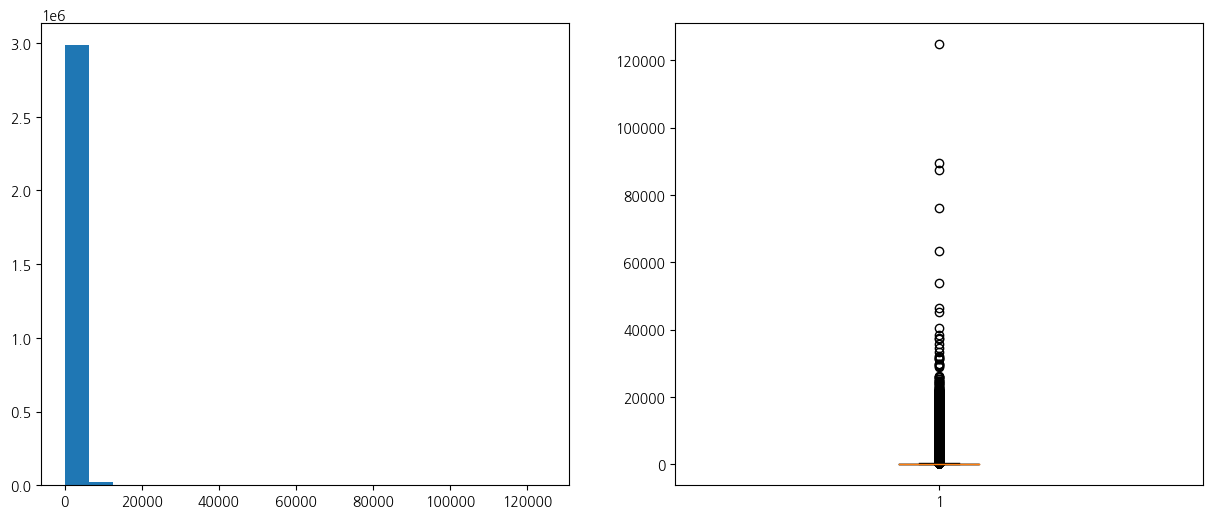

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train['sales'],bins=20)
ax2.boxplot(train['sales'])

In [80]:
train['sales'].skew()

7.366961907141204

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce99c524f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce99c52a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce99c52250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce99c61070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce99c61340>],
 'means': []}

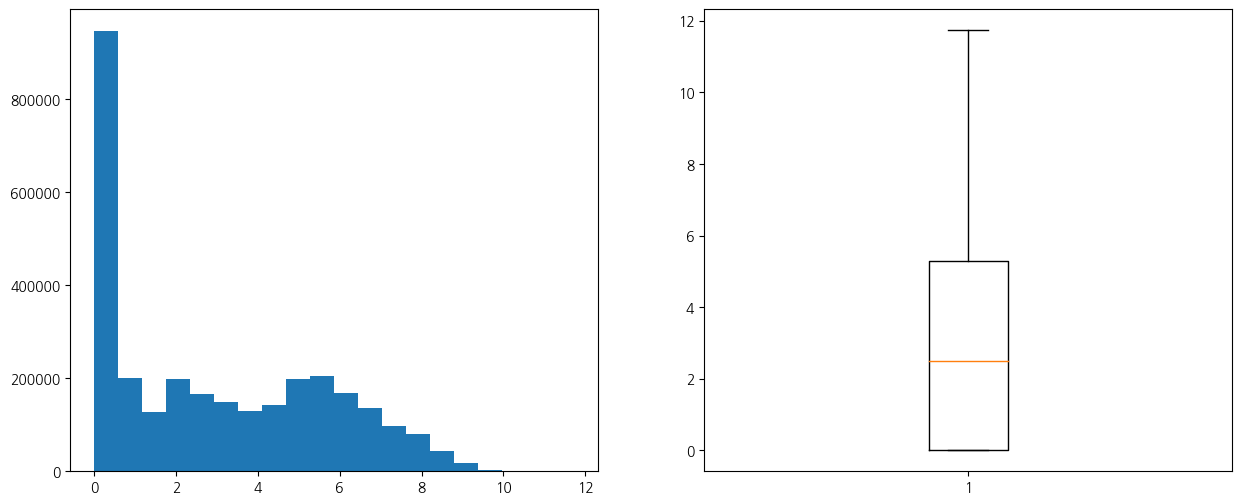

In [81]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(np.log1p(train['sales']),bins=20)
ax2.boxplot(np.log1p(train['sales']))

In [82]:
np.log1p(train['sales']).skew()

0.41175884683078207

sales 변수가 왜도값이 크고 이상치가 많으므로 y변수로 넣을 때 로그변환 해서 넣기!!

### b) onpromotin 변수

onpromotion도 마찬가지

In [12]:
train['onpromotion'].fillna(0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce612acc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce612b9220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce612ac970>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce612b97c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce612b9a90>],
 'means': []}

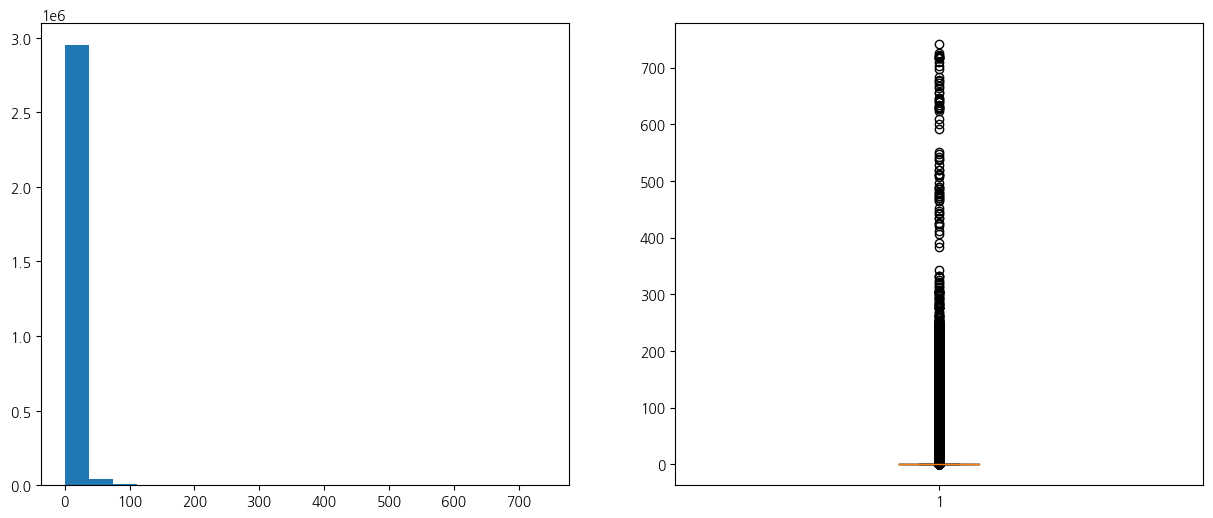

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train['onpromotion'],bins=20)
ax2.boxplot(train['onpromotion'])

In [74]:
train['onpromotion'].skew()

11.179506173453468

In [83]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
pd.DataFrame(train['onpromotion'].value_counts().sort_index())
# onpromotion이 0인 값이 굉장히 많음 + 이상치가 굉장히 많음

,onpromotion
0.0,2396687
1.0,174551
2.0,79386
3.0,45862
4.0,31659
5.0,24540
6.0,22079
7.0,18917
8.0,15587
9.0,13850


데이터 왜도값이 굉장히 크고 이상치가 많음

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce79d775b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce79d77b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce79d77310>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce79d83130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce79d83400>],
 'means': []}

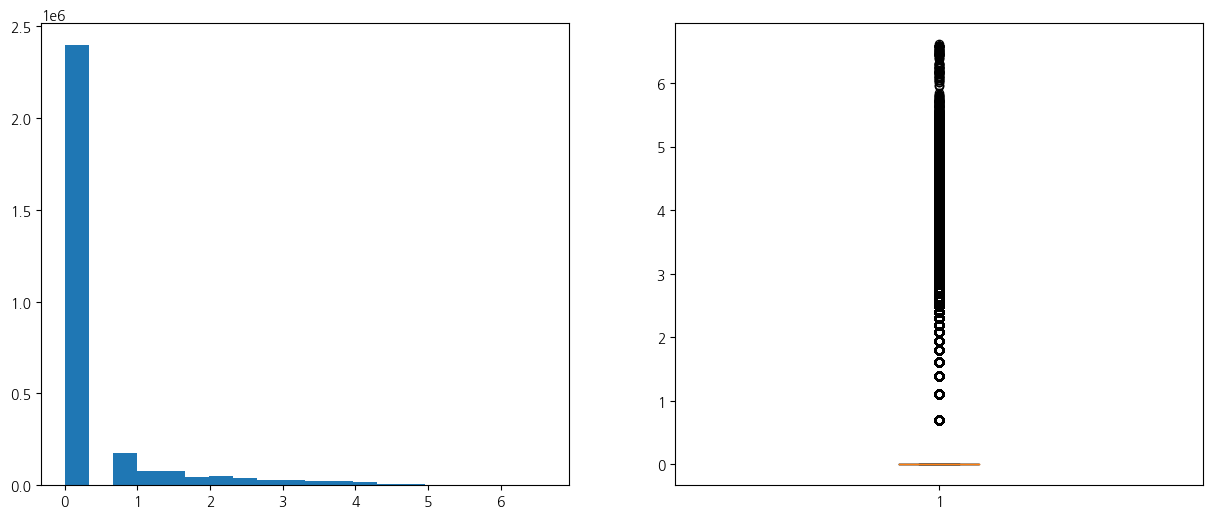

In [75]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(np.log1p(train['onpromotion']),bins=20)
ax2.boxplot(np.log1p(train['onpromotion']))

In [76]:
np.log1p(train['onpromotion']).skew()

2.7271843021834

로그 변환한 결과 여전히 이상치는 많지만 왜도값이 보정된 걸 확인할 수 있음

In [78]:
# 일단 로그 변환한거 새로운 변수로 추가
train['onpromotion_exp']=np.log1p(train['onpromotion'])

### c) dcoilwitco 변수

dcoilwtico 결측치 선형보간법으로 채우기

In [69]:
train['dcoilwtico'] = train['dcoilwtico'].interpolate()

In [89]:
train['dcoilwtico'].isna().sum()

1782

In [91]:
train[train['dcoilwtico'].isna()]['date'].unique()

array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [94]:
# 맨처음 nan 값은 뒤의 값으로 대체
train[train['date']=='2013-01-01T00:00:00.000000000']['dcoilwtico']=93.14

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_22568\1375483118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train['date']=='2013-01-01T00:00:00.000000000']['dcoilwtico']=93.14


### d) date 변수

date 열에서 연,월,일 파생변수 생성

In [13]:
train['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3008011    2017-08-15
3008012    2017-08-15
3008013    2017-08-15
3008014    2017-08-15
3008015    2017-08-15
Name: date, Length: 3008016, dtype: object

In [16]:
# 'Date' 열을 날짜 형식으로 변환
train['date'] = pd.to_datetime(train['date'])

# 'Year', 'Month', 'Day' 열 생성
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

### e) holiday 변수

In [84]:
train['holiday'].value_counts()

Normal      2746128
National     249480
Local         11418
Regional        990
Name: holiday, dtype: int64

In [86]:
# holiday면 1, 아니면 0으로 파생 변수 생성
train['holiday_yn']=1
train.loc[train['holiday']=='Normal','holiday_yn']=0
train['holiday_yn'].value_counts()

0    2746128
1     261888
Name: holiday_yn, dtype: int64

### f) weekday/weekend 변수

In [102]:
# 'weekday' 열을 생성하여 요일을 저장 
train['weekday'] = train['date'].dt.strftime('%a')

# 'weekend' 열을 생성하여 주말 여부를 나타내는 변수를 만듦 (주말이면 1, 아니면 0)
train['weekend'] = train['weekday'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)

# 결과 출력
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday,year,month,day,onpromotion_exp,holiday_yn,weekday,weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,National,2013,1,1,0.0,1,Tue,0
1,1,2013-01-01,42,CELEBRATION,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National,2013,1,1,0.0,1,Tue,0
2,2,2013-01-01,42,BREAD/BAKERY,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National,2013,1,1,0.0,1,Tue,0
3,3,2013-01-01,42,BOOKS,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National,2013,1,1,0.0,1,Tue,0
4,4,2013-01-01,42,BEVERAGES,0.0,0.0,Cuenca,Azuay,D,2,NaN,NaN,National,2013,1,1,0.0,1,Tue,0


In [104]:
train['weekend'].value_counts()

0    2149092
1     858924
Name: weekend, dtype: int64

## 2) 데이터 시각화

### a) 시계열 sales 시각화

In [109]:
train['year'].head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='sales'>

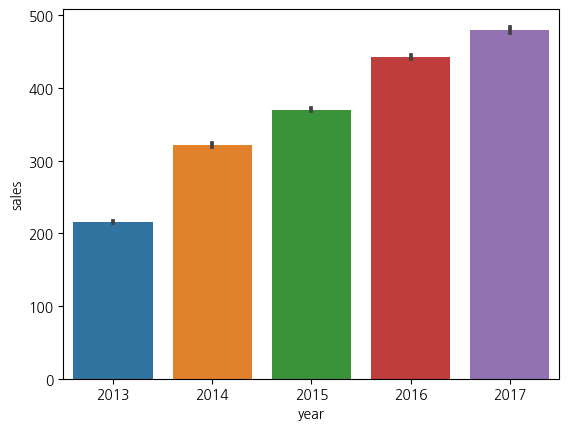

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 데이터
# Barplot 그리기
sns.barplot(data=train, x='year', y='sales')

In [ ]:
# Lineplot 그리기
sns.lineplot(data=train, x='year', y='sales')

sales 판매량이 매해 증가하는 것으로 확인됨

<AxesSubplot:xlabel='year', ylabel='sales'>

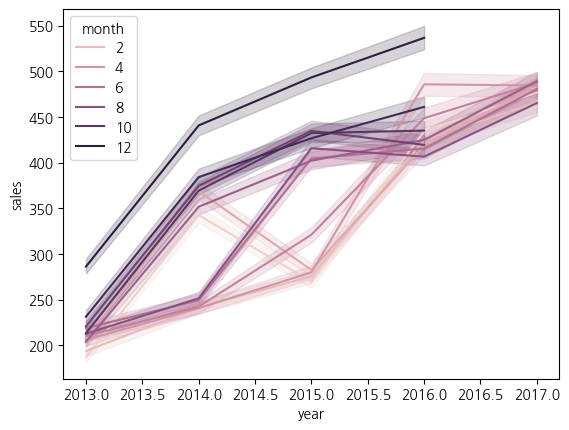

In [23]:
# 연도별 월 데이터
sns.lineplot(data=train, x='year', y = 'sales',hue='month')

<AxesSubplot:xlabel='year', ylabel='sales'>

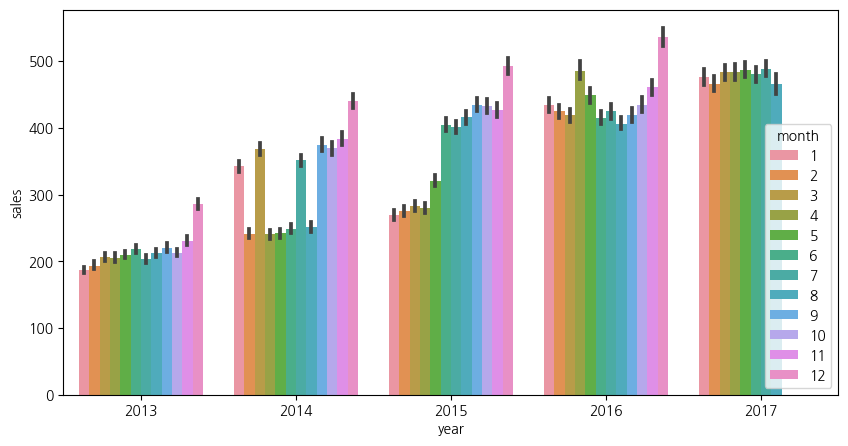

In [19]:
# 연도별 흐름에 따른 월별 데이터
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='year', y = 'sales',hue='month')

12월 판매량이 제일 높고 2014년에는 3월, 2016년에는 4월 판매량이 그 다음으로 높았음

<AxesSubplot:xlabel='month', ylabel='sales'>

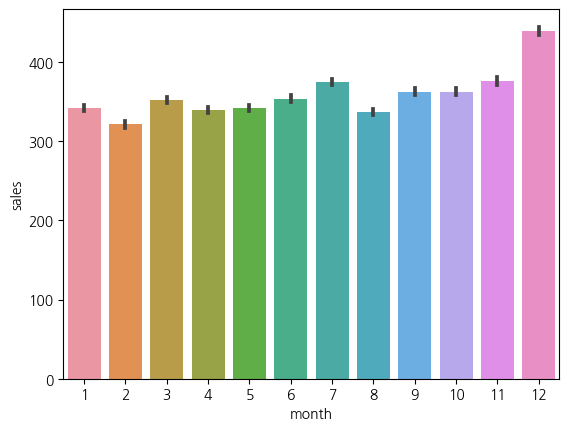

In [20]:
# 월별 데이터
sns.barplot(data=train, x='month', y = 'sales')

전체적으로 12월 판매량이 제일 높고 그 다음은 7월 (근데 이건 train 데이터에서 2017년 데이터가 8월 중순까지 밖에 없어서 그런 것 같음)

<AxesSubplot:xlabel='month', ylabel='sales'>

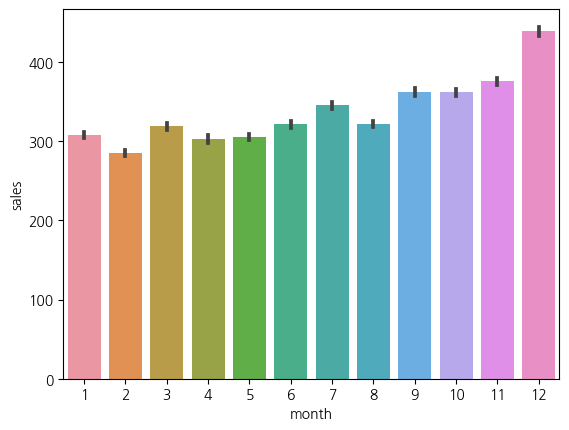

In [30]:
# 2017년을 제외한 월별 데이터
sns.barplot(data=train[train['year']!=2017], x='month', y = 'sales')

12월 판매량이 가장 높고 2월이 가장 적음. 나머지는 비슷비슷해보임..

<AxesSubplot:xlabel='month', ylabel='sales'>

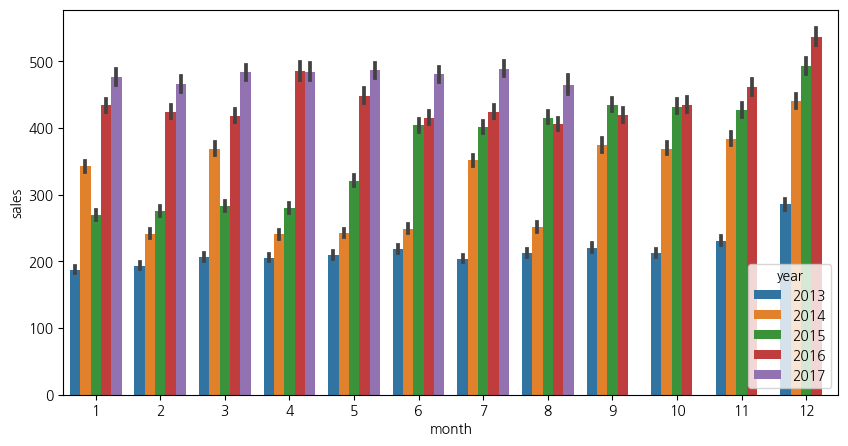

In [21]:
# 월별 흐름에 따른 연도별 데이터
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='month', y = 'sales',hue='year')

In [107]:
train.corr()['sales']

id                 0.085526
store_nbr          0.041142
sales              1.000000
onpromotion        0.428011
cluster            0.038475
dcoilwtico        -0.074479
transactions       0.214815
year               0.081203
month              0.018407
day               -0.012688
onpromotion_exp    0.476006
holiday_yn         0.014291
weekend            0.051871
Name: sales, dtype: float64

In [106]:
train[train['year']!=2017].corr()['sales']

id                 0.082868
store_nbr          0.037823
sales              1.000000
onpromotion        0.379989
cluster            0.038816
dcoilwtico        -0.072642
transactions       0.214289
year               0.077239
month              0.033418
day               -0.011328
onpromotion_exp    0.456282
holiday_yn         0.018498
weekend            0.052340
Name: sales, dtype: float64

### b) 시계열 dcoilwtico 시각화

In [ ]:
# 연도별 데이터
# Barplot 그리기
sns.barplot(data=train, x='year', y='dcoilwtico', ax=ax1)

In [ ]:
# Lineplot 그리기
sns.lineplot(data=train, x='year', y='dcoilwtico', ax=ax2)

<AxesSubplot:xlabel='year', ylabel='dcoilwtico'>

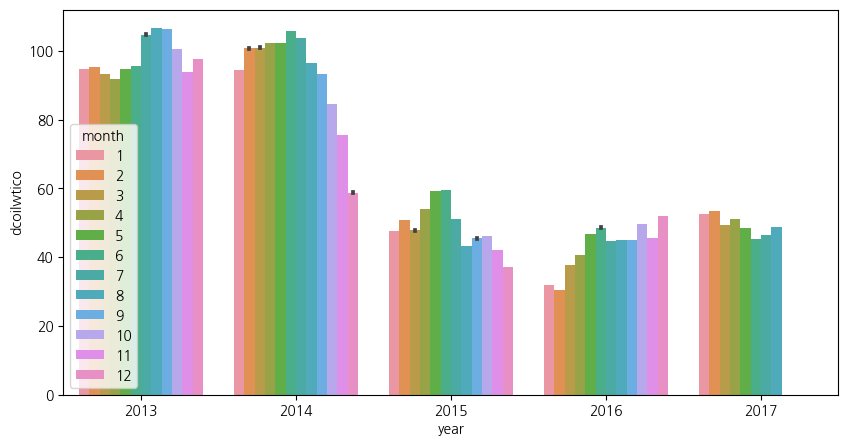

In [114]:
# 연도별 흐름에 따른 월별 데이터
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='year', y = 'dcoilwtico',hue='month')

<AxesSubplot:xlabel='month', ylabel='dcoilwtico'>

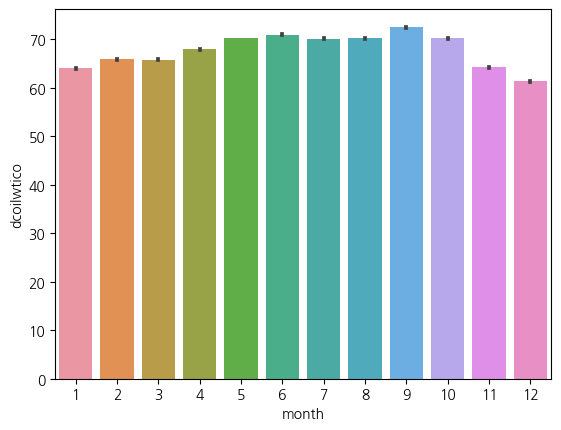

In [115]:
# 월별 데이터
sns.barplot(data=train, x='month', y = 'dcoilwtico')

In [ ]:
# 2017년을 제외한 월별 데이터
sns.barplot(data=train[train['year']!=2017], x='dcoilwtico', y = 'sales')

In [ ]:
# 연도별로 나눠서 보기
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# 각 연도별로 히스토그램 그리기
for i, year in enumerate(range(2013, 2018)):
    sns.histplot(data=train[train['year'] == year], x='family', y='sales', ax=axes[i], bins=30, stat='sum')
    axes[i].set_title(f'Year {year}')

# 그래프 출력
plt.show()

### c) family + city 시각화

In [ ]:
# family별 sales의 sum값 계산히기
train.groupby('family')['sales'].sum().sort_values(ascending=False)

In [ ]:
# family별 sales의 mean값 계산히기
train.groupby('family')['sales'].mean().sort_values(ascending=False)

In [ ]:
# family별 sales의 mean값,sum값 histplot으로 확인하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train.groupby('family')['sales'].sum(),bins=30)
ax2.hist(train.groupby('family')['sales'].mean(),bins=30)

In [ ]:
# city별 sales의 sum값 계산히기
pd.options.display.float_format = '{:.5f}'.format
train.groupby('family')['sales'].sum().sort_values(ascending=False)

In [ ]:
# city별 sales의 mean값 계산히기
pd.options.display.float_format = '{:.5f}'.format
train.groupby('family')['sales'].mean().sort_values(ascending=False)

In [ ]:
# city별 sales의 mean값,sum값 histplot으로 확인하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train.groupby('city')['sales'].sum(),bins=30)
ax2.hist(train.groupby('city')['sales'].mean(),bins=30)

### d) 상관계수 그래프 시각화

In [66]:
# train에서 숫자형 데이터만 추출
train_num=train[['store_nbr','sales','onpromotion','cluster','dcoilwtico','year','month','day','onpromotion_exp']]

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


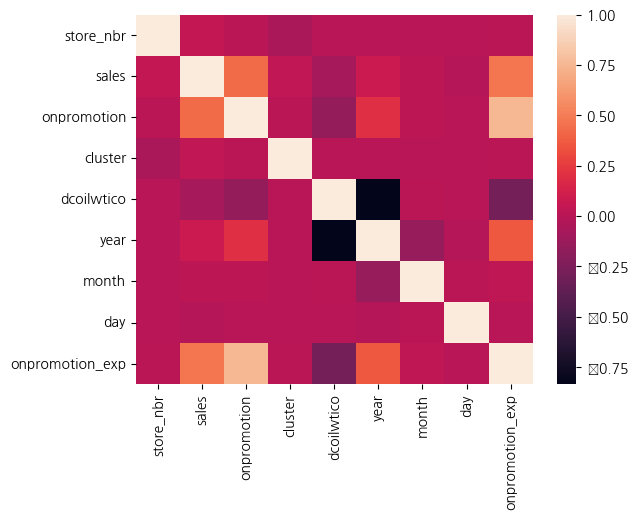

In [68]:
sns.heatmap(train_num.corr())